# Conditional frequency distributions

## 1. Text corpora
The Brown corpus (1961) contains text from 500 sources, categorized by genre (e.g. news, editorial, hobbies, fiction, etc.)

In [1]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
brown.words(categories='lore')

['In', 'American', 'romance', ',', 'almost', 'nothing', ...]

## 2. Conditional frequency distributions
Frequency distributions conditioned on categories (e.g. genre, topic, author, etc.)

In [4]:
cfd = nltk.ConditionalFreqDist((genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [5]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [6]:
cfd['science_fiction']

FreqDist({',': 791, '.': 786, 'the': 652, 'of': 321, 'to': 305, 'and': 278, '``': 235, "''": 235, 'a': 222, 'was': 198, ...})

In [7]:
from nltk.corpus import udhr

In [8]:
languages = ['English', 'German_Deutsch', 'Swahili_Kiswahili', 'Hungarian_Magyar']

In [9]:
nltk.download('udhr')

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.


True

#### Can we find evidence of compounding?

In [10]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
     for lang in languages
     for word in udhr.words(lang + '-Latin1'))

In [11]:
cfd.tabulate()

                    1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
          English 185 340 358 114 169 117 157 118  80  63  50  12  11   6   1   0   0   0   0   0   0   0 
   German_Deutsch 171  92 351 103 177 119  97 103  62  58  53  32  27  29  15  14   3   7   5   2   1   0 
 Hungarian_Magyar 302 129  72 152 112 114  91 109  90 105  71  48  38  17  13   8   3   7   2   1   0   1 
Swahili_Kiswahili 194 386 214 365 165 183 135 101  53  46  23  11   8   2   1   0   0   0   0   0   0   0 


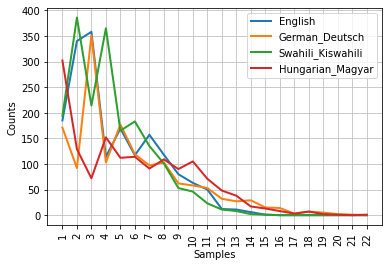

In [12]:
cfd.plot()

## 3. Generating fake news
Using bigrams to produce random text

In [13]:
s = ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']

In [14]:
list(nltk.bigrams(s))

[('The', 'cat'),
 ('cat', 'sat'),
 ('sat', 'on'),
 ('on', 'the'),
 ('the', 'mat'),
 ('mat', '.')]

In [15]:
text = brown.words(categories='news')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [16]:
def generate_text(cfdist, word, num=50):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [17]:
cfd.get('Grand')

FreqDist({'Jury': 2, 'Ledge': 1, 'Ballroom': 1, 'Dukes': 1, 'Prix': 1})

In [18]:
generate_text(cfd, 'pass')

pass enabling legislation to the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the 

In [19]:
import random
def generate_text(cfdist, word, num=100, n=2):
    for i in range(num):
        print(word, end=' ')
        fdist = cfdist[word]
#         print(fdist)
        words = list(fdist.keys())[:n]
#         print(words)
        word = random.choice(words)

In [20]:
generate_text(cfd, 'He')

He told the City Executive Committee , `` deserves the election , `` no -- a number of Atlanta's recent weeks ago was conducted . `` no -- and the City Executive returned to have a relative handful of Atlanta's recent weeks ago served notice was conducted the election produced `` no evidence '' that the election , `` deserves a number of Atlanta's new management takes it did not elaborate , `` deserves the election produced extraordinary work for the election produced `` deserves the City of Atlanta's new multi-million-dollar airport be combined to investigate . The jury further 

## Practical:
Extend to include randomness, i.e. random choice from top N.

What effect dies increasing N have - does it make the text more or less intelligible? Why?